In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Danish Version 
Human Tender - 1st Excerpt  
AI Tender - 2st Excerpt  
AI Relaxed - 3st Excerpt  
Human Relaxed - 4st Excerpt  

In [2]:
dfDK = pd.read_csv('Results/DK-Results-Human.csv', dtype=str, keep_default_na=False)
dk = dfDK.copy()
dk

,SurveyName,Tags,Quiet,Headphones,Calibration,Dscr,Excerpt1,Recognized1,NoEmo1,Pleasure1,...,Awakeness4,Sleepiness4,Tension4,Relaxation4,Gender,Old,MusicTime,EducationYN,EducationType,End
0,Emotions in Cinematic Music,2023-12-17 22:09:11,I am in a somewhat quiet place,No,,,,No,,None,...,None,Mild,None,Mild,Male,25-34,1 to 3 hours,Yes,Other,


### Polish Version 
AI Tender - 1st Excerpt  
Human Tender - 2st Excerpt  
Human Relaxed - 3st Excerpt  
AI Relaxed - 4st Excerpt  

In [3]:
dfPL = pd.read_csv('Results/PL-Results-AI.csv', dtype=str, keep_default_na=False)
pl = dfPL.copy()
pl['Recognized2']

0     No
1     No
2     No
3     No
4    Yes
5     No
6     No
7     No
Name: Recognized2, dtype: object

### Drop describtions and useless data

In [4]:
pl.drop(["Calibration","Dscr","NoEmo1","NoEmo2","NoEmo3","NoEmo4","End", "Excerpt1","Excerpt2","Excerpt3","Excerpt4"], axis=1);
dk.drop(["Calibration","Dscr","NoEmo1","NoEmo2","NoEmo3","NoEmo4","End", "Excerpt1","Excerpt2","Excerpt3","Excerpt4"], axis=1);

In [5]:
# DATA MAPPINGS
label_mapping = {
    'None': 1,
    'Very weak': 2,
    'Weak': 3,
    'Mild': 4,
    'Moderete': 5,
    'Strong': 6,
    'Very Strong': 7
}

# Map the string labels to numeric scales for specific columns
emotion_columns = ['Pleasure', 'Displeasure', 'Awakeness', 'Sleepiness','Tension','Relaxation'];

In [6]:
def emotionLabelsToNumeric(df):
    dfCopy = df.copy()
    for col in emotion_columns:
        dfCopy[col] = dfCopy[col].map(label_mapping)
    return dfCopy

def deleteColumnNumbers(df):
    df.rename(columns=lambda x: ''.join([i for i in x if not i.isdigit()]), inplace=True)

In [7]:
# Filter Emotions DK
humanTenderDK = dk.filter(['Tags','Recognized1','Pleasure1','Displeasure1','Awakeness1','Sleepiness1','Tension1', 'Relaxation1'], axis=1)
aiTenderDK = dk.filter(['Tags','Recognized2','Pleasure2','Displeasure2','Awakeness2','Sleepiness2','Tension2', 'Relaxation2'], axis=1)
aiRelaxedDK = dk.filter(['Tags','Recognized3','Pleasure3','Displeasure3','Awakeness3','Sleepiness3','Tension3', 'Relaxation3'], axis=1)
humanRelaxedDK = dk.filter(['Tags','Recognized4','Pleasure4','Displeasure4','Awakeness4','Sleepiness4','Tension4', 'Relaxation4'], axis=1)

deleteColumnNumbers(humanTenderDK)
deleteColumnNumbers(humanRelaxedDK)
deleteColumnNumbers(aiTenderDK)
deleteColumnNumbers(aiRelaxedDK)

In [8]:
# Filter Emotions PL
humanTenderPL = pl.filter(['Tags','Recognized1','Pleasure1','Displeasure1','Awakeness1','Sleepiness1','Tension1', 'Relaxation1'], axis=1)
aiTenderPL = pl.filter(['Tags','Recognized2','Pleasure2','Displeasure2','Awakeness2','Sleepiness2','Tension2', 'Relaxation2'], axis=1)
aiRelaxedPL = pl.filter(['Tags','Recognized3','Pleasure3','Displeasure3','Awakeness3','Sleepiness3','Tension3', 'Relaxation3'], axis=1)
humanRelaxedPL = pl.filter(['Tags','Recognized4','Pleasure4','Displeasure4','Awakeness4','Sleepiness4','Tension4', 'Relaxation4'], axis=1)

deleteColumnNumbers(humanTenderPL)
deleteColumnNumbers(humanRelaxedPL)
deleteColumnNumbers(aiTenderPL)
deleteColumnNumbers(aiRelaxedPL)

In [9]:
humanTender = pd.concat([humanTenderDK, humanTenderPL], ignore_index=True)
aiTender = pd.concat([aiTenderDK, aiTenderPL], ignore_index=True)
aiRelaxed = pd.concat([aiRelaxedDK, aiRelaxedPL], ignore_index=True)
humanRelaxed = pd.concat([humanRelaxedDK, humanRelaxedPL], ignore_index=True)

human = pd.concat([humanRelaxed, humanTender], ignore_index=True)
ai = pd.concat([aiRelaxed, aiTender], ignore_index=True)

In [10]:
humanTender

,Tags,Recognized,Pleasure,Displeasure,Awakeness,Sleepiness,Tension,Relaxation
0,2023-12-17 22:09:11,No,None,None,Moderete,Very weak,Strong,None
1,2023-12-18 20:42:32,No,Very weak,None,None,Moderete,None,Weak
2,2023-12-18 19:22:29,No,Weak,Moderete,Moderete,Very weak,Strong,Very weak
3,2023-12-18 17:53:15,No,Strong,None,Very weak,Moderete,Mild,Moderete
4,2023-12-18 14:16:15,No,Weak,Moderete,Very weak,Moderete,Mild,Weak
5,2023-12-18 11:41:33,No,Weak,Mild,Moderete,Weak,Moderete,Weak
6,2023-12-18 09:28:56,No,Weak,Moderete,Very Strong,None,Strong,None
7,2023-12-18 07:57:29,No,Moderete,Very weak,Strong,Weak,Strong,Weak
8,2023-12-15 21:28:06,No,Mild,Very weak,Weak,Very weak,Moderete,Weak


## Data Analysis

In [11]:
# Sprawdzenie czy ktokolwiek rozpoznał
def findRecognized(df):
    x = df.loc[df['Recognized']=='Yes']
    if x.empty:
        return None
    return x

In [12]:
print("Human - Tender")
print(findRecognized(humanTender))
print("\n")

print("AI - Tender")
print(findRecognized(aiTender))
print("\n")

print("Human - Relaxed")
print(findRecognized(humanRelaxed))
print("\n")

print("AI - Relaxed")
print(findRecognized(aiRelaxed))

Human - Tender
None


AI - Tender
                  Tags Recognized  Pleasure Displeasure Awakeness Sleepiness  \
5  2023-12-18 11:41:33        Yes  Moderete   Very weak    Strong  Very weak   

  Tension Relaxation  
5    Mild   Moderete  


Human - Relaxed
None


AI - Relaxed
None


In [13]:
# If sth gets recognized in Human (and its not a person who recognized ai too lol) filter them out

In [14]:
aiTenderDKNum = emotionLabelsToNumeric(aiTenderDK)
humanTenderDKNum = emotionLabelsToNumeric(humanTenderDK)
humanRelaxedDKNum = emotionLabelsToNumeric(humanRelaxedDK)
aiRelaxedDKNum = emotionLabelsToNumeric(aiRelaxedDK)

aiTenderPLNum = emotionLabelsToNumeric(aiTenderPL)
humanTenderPLNum = emotionLabelsToNumeric(humanTenderPL)
humanRelaxedPLNum = emotionLabelsToNumeric(humanRelaxedPL)
aiRelaxedPLNum = emotionLabelsToNumeric(aiRelaxedPL)

aiTenderNum = emotionLabelsToNumeric(aiTender)
humanTenderNum = emotionLabelsToNumeric(humanTender)
humanRelaxedNum = emotionLabelsToNumeric(humanRelaxed)
aiRelaxedNum = emotionLabelsToNumeric(aiRelaxed)

aiNum = emotionLabelsToNumeric(ai)
humanNum = emotionLabelsToNumeric(human)

In [33]:
aiNum

,Tags,Recognized,Pleasure,Displeasure,Awakeness,Sleepiness,Tension,Relaxation
0,2023-12-17 22:09:11,No,1,1,1,1,1,1
1,2023-12-18 20:42:32,No,6,1,5,1,3,5
2,2023-12-18 19:22:29,No,6,2,3,3,3,6
3,2023-12-18 17:53:15,No,4,4,5,3,6,3
4,2023-12-18 14:16:15,No,6,2,3,5,3,6
5,2023-12-18 11:41:33,No,6,1,4,3,2,6
6,2023-12-18 09:28:56,No,2,3,6,2,3,2
7,2023-12-18 07:57:29,No,5,2,6,1,3,5
8,2023-12-15 21:28:06,No,5,1,2,4,5,6
9,2023-12-17 22:09:11,No,1,1,2,4,2,2


In [16]:
# Write a function which takes dataframe and emotion name and plots everything needed
# def plotSth(excerptTitle, df):
# plot = aiRelaxedDKNum.plot(kind='pie', title="My plot", subplots=True)

Relaxation    int64
Relaxation    int64
dtype: object

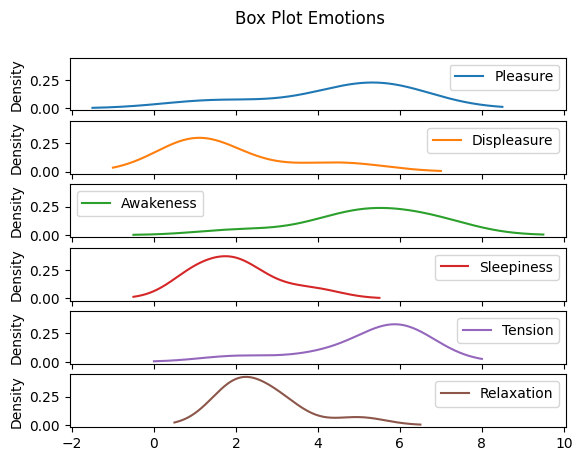

In [18]:
plot = aiTenderNum[emotion_columns].plot(kind='kde', title="Box Plot Emotions", subplots=True, sharey=True)